In [ ]:
!pip install datascience

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.0/725.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.6 MB/s eta 0:00:00


In [ ]:
from datascience import *
%matplotlib inline
#path_data = '../data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# 결정과 불확실성

배심원 선정에 대한 모델을 평가하기 위해 개발한 통계적 및 계산적 방법론은 *가설의 통계적 검정*이라고 불리는 일반적인 의사결정 프레임워크에 적합합니다. 의사결정 방법으로 통계적 검정을 사용하는 것은 많은 분야에서 표준이며 표준 용어를 가지고 있습니다.

이 섹션에서는 일부 용어와 함께 통계적 검정에 사용되는 일반적인 단계 순서를 설명할 것입니다.

우리의 예는 생물학에서 온 것이지만, 통계적 및 계산적 단계가 법률 시스템의 데이터 분석의 해당 단계와 일치한다는 것을 볼 수 있습니다. 그러나 생물학적 데이터는 식물에 관한 것이지 인간과 불공정에 관한 것이 아닙니다. 따라서 아래 계산의 맥락과 해석은 훨씬 더 간단합니다.

[Gregor Mendel](https://en.wikipedia.org/wiki/Gregor_Mendel) (1822-1884)은 현대 유전학 분야의 창시자로 널리 인정받는 오스트리아의 수도사였습니다. Mendel은 기본적인 유전 법칙을 도출하기 위해 식물에 대한 신중하고 대규모 실험을 수행했습니다.

그의 많은 실험은 완두콩 식물의 품종에 관한 것이었습니다. 그는 각 품종에 대한 가정 집합을 공식화했습니다; 이것들이 그의 모델이었습니다. 그런 다음 식물을 키우고 데이터를 수집하여 모델의 타당성을 검정했습니다.

특정 품종의 완두콩 식물에 대해, Mendel은 다음 모델을 제안했습니다.

## Mendel의 모델 ##
모든 식물에 대해, 다른 모든 식물의 색깔과 관계없이 보라색 꽃을 가질 확률이 75%이고 흰색 꽃을 가질 확률이 25%입니다.

그의 모델이 타당한지 보기 위해, Mendel은 이 품종의 완두콩 식물 929개를 키웠습니다. 이 929개의 식물 중 705개가 보라색 꽃을 가졌습니다.

우리는 이 데이터를 사용하여 가설 검정을 수행하고 Mendel의 모델이 좋아 보이는지 볼 것입니다.

## 단계 1: 가설

모든 통계적 검정은 세계에 대한 두 관점 사이에서 선택하려고 시도합니다. 구체적으로, 선택은 데이터가 어떻게 생성되었는지에 대한 두 관점 사이입니다. 이 두 관점을 *가설*이라고 합니다.

**귀무가설.** 이것은 확률에 대한 명확하게 정의된 모델입니다. 데이터가 무작위성에 대한 명확하게 지정된 가정 하에서 무작위로 생성되었다고 말합니다. "귀무"라는 단어는 데이터가 귀무가설이 예측하는 것과 다르게 보인다면, 그 차이가 우연 외에는 *아무것도* 아니라는 아이디어를 강화합니다.

실용적 관점에서, **귀무가설은 데이터를 시뮬레이션할 수 있는 가설입니다.**

완두콩 식물의 색깔에 대한 Mendel의 모델에 관한 예에서, **귀무가설은 그의 모델의 가정이 좋다는 것입니다: 각 식물은 다른 모든 식물과 독립적으로 보라색 꽃을 가질 확률이 75%입니다**.

이 가설 하에서, 우리는 `sample_proportions`를 사용하여 무작위 표본을 시뮬레이션할 수 있습니다.

**대립가설.** 이것은 귀무가설의 모델 예측과 다르게 데이터를 만든 우연 이외의 어떤 이유가 있다고 말합니다.

Mendel의 식물에 관한 예에서, 대립가설은 단순히 그의 모델이 좋지 않다는 것입니다.

대립가설은 모델이 어떻게 또는 왜 좋지 않은지 말하지 않는다는 것을 명심하십시오. 단지 모델이 좋지 않다고 말할 뿐입니다.

## 단계 2: 검정통계량

두 가설 사이를 결정하기 위해, 결정을 내리는 데 사용할 수 있는 통계량을 선택해야 합니다. 이것을 **검정통계량**이라고 합니다.

우리는 두 범주형 분포를 비교할 것입니다: Mendel의 모델의 분포와 우리 무작위 표본에서 얻을 분포. 이 두 분포가 서로 가까운지 또는 멀리 떨어져 있는지 보고 싶습니다. 따라서 자연스러운 검정통계량은 이전 섹션에서 개발한 총 변동 거리(TVD)입니다.

두 범주만 있으면 TVD는 다소 간단하고 해석하기 쉬운 것으로 밝혀졌습니다. 예를 살펴봅시다. Mendel의 모델은 "보라색, 흰색" 분포가 [0.75, 0.25]라고 말합니다. 우리 표본의 분포가 [0.7, 0.3]으로 나왔다고 가정합시다.

두 범주만 있기 때문에, TVD를 계산할 때 흥미로운 일이 일어납니다. 먼저 다음을 주목하십시오

$$
\vert 0.7 - 0.75 \vert = 0.05 = \vert 0.3 - 0.25 \vert
$$

따라서 TVD는

$$
\frac{1}{2}\bigl( \vert 0.7 - 0.75 \vert + \vert 0.3 - 0.25 \vert \bigr) = 0.05
= \vert 0.7 - 0.75 \vert
$$

그것은 보라색 꽃을 가진 식물의 두 비율 사이의 거리일 뿐입니다. 흰색 꽃을 가진 식물의 두 비율 사이의 거리이기도 합니다.

여기서 하지 않을 약간의 수학에 의해, 이것은 두 범주만 있을 때마다 참입니다: TVD는 한 범주의 두 비율 사이의 거리와 같습니다.

따라서 완벽하게 좋은 검정통계량은 표본의 보라색 식물 비율과 0.75 사이의 거리일 것이며, 0.75는 Mendel의 모델의 해당 비율입니다.

백분율은 비율보다 해석하기 쉬우므로, 백분율로 작업할 것입니다.

우리의 검정통계량은 표본의 보라색 꽃을 가진 식물 백분율과 75% 사이의 거리일 것이며, 75%는 Mendel의 모델의 해당 백분율입니다.

$$
\bigl\vert ~ \text{보라색 꽃을 가진 식물의 표본 백분율} - 75 ~ \bigr\vert
$$

이 검정통계량은 두 분포 사이의 *거리*입니다. 의미가 있고 사용하기 쉽습니다. 약 75%의 표본 백분율은 모델과 일치할 것이지만, 75%보다 훨씬 크거나 훨씬 작은 백분율은 모델이 좋지 않다고 생각하게 만들 것입니다. 따라서 거리의 작은 값은 귀무가설을 지지하게 만들 것입니다. 통계량의 큰 값은 대립가설을 지지하게 만들 것입니다.

다른 상황에서 검정통계량을 선택하려면, 대립가설을 살펴보십시오. 통계량의 어떤 값이 대립가설이 귀무가설보다 더 나은 선택이라고 생각하게 만들까요?
- 답이 "큰 값"이면, 통계량을 잘 선택한 것입니다.
- "작은 값"도 마찬가지입니다.
- 그러나 답이 "큰 값과 작은 값 모두"라면, 통계량을 다시 살펴보는 것이 좋습니다. 차이 대신 거리를 사용하면 답을 "큰 값"으로만 바꿀 수 있는지 확인하십시오.

### 검정통계량의 관측값 ###
*검정통계량의 관측값*은 시뮬레이션된 값이 아니라 연구의 데이터에서 얻은 통계량의 값입니다. Mendel의 929개 식물 중 705개가 보라색 꽃을 가졌습니다. 따라서 검정통계량의 관측값은

In [ ]:
observed_statistic = abs ( 100 * (705 / 929) - 75)
observed_statistic

0.8880516684607045

## 단계 3: 귀무가설 하의 검정통계량 분포

가설 검정의 주요 계산적 측면은 귀무가설의 모델이 무엇을 예측하는지 파악하는 것입니다. 구체적으로, *귀무가설이 참이라면 검정통계량의 값이 무엇이 될 수 있는지* 파악해야 합니다.

검정통계량은 귀무가설의 모델 가정을 기반으로 시뮬레이션됩니다. 그 모델은 확률을 포함하므로, 여러 번 시뮬레이션할 때 통계량은 다르게 나옵니다.

통계량을 반복적으로 시뮬레이션함으로써, 가능한 값과 어떤 값이 다른 값보다 더 가능성이 있는지 잘 파악할 수 있습니다. 다시 말해, 귀무가설의 모델이 예측하는 대로 통계량의 확률 분포에 대한 좋은 근사를 얻습니다.

모든 분포와 마찬가지로, 이전 예에서 했던 것처럼 히스토그램으로 이 분포를 시각화하는 것이 매우 유용합니다. 여기서 전체 과정을 살펴봅시다.

몇 가지 알려진 양을 이름에 할당하는 것으로 시작할 것입니다.

In [ ]:
mendel_proportions = make_array(0.75, 0.25)
mendel_proportion_purple = mendel_proportions.item(0)
sample_size = 929

다음으로, 검정통계량의 시뮬레이션된 값 하나를 반환하는 함수를 정의할 것입니다. 그런 다음 `for` 루프를 사용하여 10,000개의 시뮬레이션된 값을 배열에 수집할 것입니다.

In [ ]:
def one_simulated_distance():
    sample_proportion_purple = sample_proportions(929, mendel_proportions).item(0)
    return 100 * abs(sample_proportion_purple - mendel_proportion_purple)

In [ ]:
repetitions = 100000
distances = make_array()
for i in np.arange(repetitions):
    distances = np.append(distances, one_simulated_distance())

In [ ]:
distances

array([ 0.88805167,  2.12594187,  0.29601722, ...,  0.83423036,
        1.80301399,  1.85683531])

이제 이러한 값들의 히스토그램을 그릴 수 있습니다. 이것은 귀무가설에 의해 예측되는 *검정통계량 분포의 히스토그램*입니다.

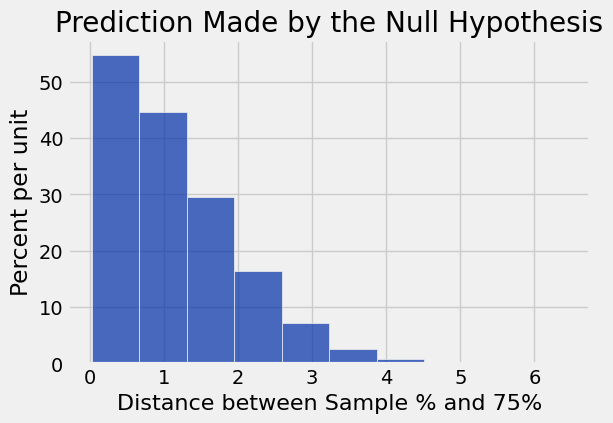

In [ ]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plots.title('Prediction Made by the Null Hypothesis');

가로축을 보고 모델이 예측하는 거리의 전형적인 값을 확인하십시오. 그것들은 다소 작습니다. 예를 들어, 거리의 높은 비율이 0에서 1 범위에 있으며, 이는 표본의 높은 비율에 대해 보라색 꽃을 가진 식물의 백분율이 75% $\pm$ 1% 범위에 있다는 것을 의미합니다. 즉, 표본 백분율이 74%에서 76% 범위에 있습니다.

또한 이 예측은 Mendel의 모델만을 사용하여 이루어졌으며, Mendel이 키운 식물에서 관찰한 비율이 아니라는 점에 주목하십시오. 이제 예측과 Mendel의 관찰을 비교할 때입니다.

## 단계 4. 검정의 결론

귀무가설과 대립가설 사이의 선택은 단계 2와 3에서 계산한 것 사이의 비교에 달려 있습니다: 검정통계량의 관측값과 귀무가설에 의해 예측되는 그것의 분포.

두 가지가 서로 일치하지 않으면, 데이터는 귀무가설을 지지하지 않습니다. 다시 말해, 대립가설이 데이터에 의해 더 잘 뒷받침됩니다. 우리는 검정이 귀무가설을 *기각한다*고 말합니다.

두 가지가 서로 일치하면, 관측된 검정통계량은 귀무가설이 예측하는 것과 일치합니다. 다시 말해, 귀무가설이 데이터에 의해 더 잘 뒷받침됩니다. 우리는 데이터가 귀무가설과 *일치한다*고 말합니다.

우리 예에서, 검정통계량의 관측값은 위의 단계 2에서 계산한 대로 약 0.89입니다. 눈으로만 보고, 히스토그램의 가로축에서 0.89가 대략 어디에 있는지 찾으십시오. Mendel의 모델에 의해 예측되는 분포의 중심부에 명확히 있음을 알 수 있습니다.

아래 셀은 가로축에 관측값이 표시된 히스토그램을 다시 그립니다.

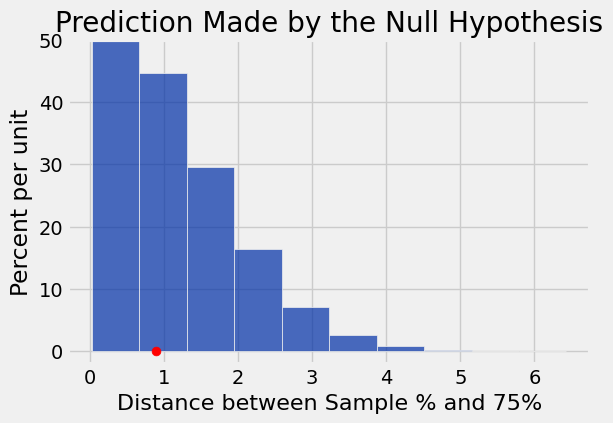

In [ ]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plots.ylim(-0.02, 0.5)
plots.title('Prediction Made by the Null Hypothesis')
plots.scatter(observed_statistic, 0, color='red', s=40);

관측된 통계량은 귀무가설에 의해 예측되는 전형적인 거리와 같습니다. 귀무가설은 Mendel의 모델입니다. 따라서 우리의 검정은 데이터가 Mendel의 모델과 일치한다고 결론짓습니다.

우리 데이터를 기반으로, Mendel의 모델이 좋아 보입니다.

"일치"의 의미

모델 평가의 모든 예에서 데이터가 모델의 예측과 일치하는지 여부에 대한 의심이 없었습니다. 배심원단에 관한 예에서처럼 모델이 예측한 것과 매우 멀리 떨어져 있거나, Mendel의 모델에 관한 예에서처럼 모델이 예측한 것과 유사했습니다.

그러나 결과가 항상 그렇게 명확한 것은 아닙니다. 얼마나 멀면 "멀다"고 할까요? "유사하다"는 정확히 무엇을 의미해야 할까요? 이러한 질문에는 보편적인 답이 없지만, 따를 수 있는 몇 가지 지침과 관례가 있습니다.

그러나 먼저, 관측된 검정통계량이 귀무가설 하의 예측된 분포와 일치하는지 여부는 주관적 의견과 판단의 문제라는 것을 이해하는 것이 중요합니다. 검정통계량의 값과 귀무가설 하의 예측된 분포 그래프와 함께 판단을 제공하는 것이 좋습니다. 그러면 독자들이 두 가지가 일치하는지에 대해 자신의 판단을 내릴 수 있습니다.

위의 예에서, 판단은 명확합니다. 그러나 누군가가 관련 품종의 다른 929개 식물을 키우고 Mendel의 모델이 그 품종의 식물에도 작동하는지 보고 싶어한다고 가정해봅시다. 아래와 같이 그들의 관측된 거리가 3.2로 나왔다면 무엇을 결론지을까요?

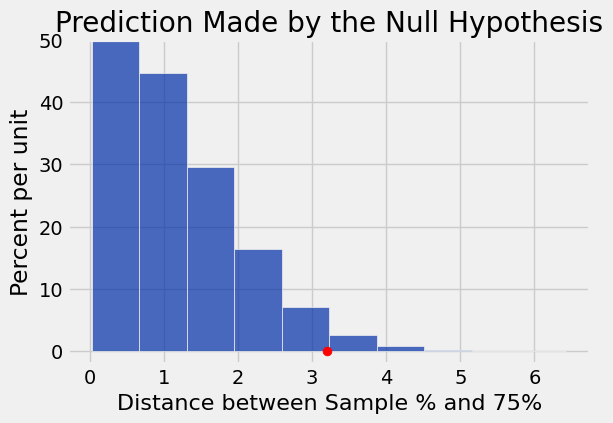

In [ ]:
different_observed_statistic = 3.2
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plots.ylim(-0.02, 0.5)
plots.title('Prediction Made by the Null Hypothesis')
plots.scatter(different_observed_statistic, 0, color='red', s=40);

새로운 품종의 식물을 기반으로 한 관찰이 히스토그램의 예측과 일치하는지, 아니면 그렇지 않은지?

이제 답이 그렇게 명확하지 않습니다. 빨간 점이 Mendel의 모델을 기반으로 한 예측과 일치하기에는 예측된 값의 대부분에서 너무 멀리 떨어져 있다고 생각하는지 여부에 달려 있습니다.

## 관례적 기준점과 p-값
자신의 판단을 사용하고 싶지 않다면, 따를 수 있는 관례가 있습니다. 이러한 관례는 꼬리에서 얼마나 멀리 나가야 관례적으로 "너무 멀다"고 간주되는지 알려줍니다.

관례는 꼬리의 면적을 기반으로 합니다, **관측된 통계량(빨간 점)에서 시작하여 대립가설을 지지하게 만드는 방향을 봅니다.** 이 예에서는 오른쪽인데, 큰 거리가 모델이 좋지 않다고 말하는 대립가설을 지지하기 때문입니다.

꼬리의 면적이 작으면, 관측된 통계량은 귀무가설에 의해 가장 일반적으로 예측되는 값에서 멀리 떨어져 있습니다.

히스토그램에서 면적은 백분율을 나타낸다는 것을 기억하십시오. 꼬리의 면적을 찾으려면, 빨간 점이 있는 3.2 이상인 거리의 백분율을 찾아야 합니다. 배열 `distances`는 Mendel의 모델 하에서 무작위 표본추출의 모든 10,000번 반복에 대한 평균을 포함하고, `different_observed_statistic`은 3.2입니다.

In [ ]:
np.count_nonzero(distances >= different_observed_statistic) / repetitions

0.0281

Mendel의 모델 하에서 시뮬레이션된 거리의 약 2.4%가 3.2 이상이었습니다. 평균의 법칙에 의해, Mendel의 모델이 이 새로운 식물에 대해 정확하다면, 검정통계량이 3.2 이상일 확률이 약 2.4%라고 결론지을 수 있습니다.

그것은 큰 확률처럼 보이지 않습니다. Mendel의 모델이 이 식물들에 대해 참이라면, 상당히 가능성이 낮은 일이 일어난 것입니다. 이 아이디어는 관례를 낳습니다.

### p-값 ##

이 확률은 인상적인 이름을 가지고 있습니다. *관측된 유의 수준* 또는 검정의 *p-값*이라고 합니다.

**정의:** 검정의 p-값은, 귀무가설의 모델을 기반으로 할 때, 검정통계량이 표본의 관측값과 같거나 대립가설을 지지하는 방향으로 더 멀리 있을 확률입니다.

**p-값이 작으면, 관측된 통계량을 넘어서는 꼬리가 작다는 것을 의미하며, 따라서 관측된 통계량은 귀무가설이 예측하는 것에서 멀리 떨어져 있습니다. 이것은 데이터가 귀무가설보다 대립가설을 더 지지한다는 것을 의미합니다.**

얼마나 작아야 "작은" 것일까요? 관례에 따르면:

- p-값이 5% 미만이면, 작다고 간주되고 결과는 "통계적으로 유의하다"고 합니다.

- p-값이 더 작아서 – 1% 미만이면 – 결과는 "매우 통계적으로 유의하다"고 합니다.

이 관례에 따르면, 우리의 2.4%의 p-값은 작다고 간주됩니다. 따라서 관례적 결론은 귀무가설을 기각하고 Mendel의 모델이 새로운 식물들에 대해 좋아 보이지 않는다고 말하는 것입니다. 공식적으로, 검정의 결과는 통계적으로 유의합니다.

이런 식으로 결론을 내릴 때, 결과가 통계적으로 유의한지 여부만 말하지 말 것을 권장합니다. 결론과 함께 관측된 통계량과 p-값도 제공하여 독자들이 자신의 판단을 사용할 수 있도록 하십시오.

## 관례에 대한 역사적 참고

위에서 정의한 대로 통계적 유의성의 결정은 모든 응용 분야의 통계 분석에서 표준이 되었습니다. 관례가 그렇게 보편적으로 따라질 때, 그것이 어떻게 생겨났는지 조사하는 것은 흥미롭습니다.

통계적 검정 방법 – 무작위 표본의 데이터를 기반으로 가설 사이에서 선택하는 것 – 은 20세기 초 **Sir Ronald Fisher**에 의해 개발되었습니다. Sir Ronald은 1925년 그의 저서 *Statistical Methods for Research Workers*에서 다음과 같은 진술로 통계적 유의성에 대한 관례를 다소 무의식적으로 설정했을 것입니다. **5% 수준에 대해, 그는 "편차가 유의하다고 판단해야 하는지 여부를 판단하는 한계로 이 점을 취하는 것이 편리하다"고 썼습니다.**

Sir Ronald에게 "편리한" 것이 보편적 상수의 지위를 획득한 기준점이 되었습니다. Sir Ronald 자신이 그 값이 많은 것 중에서 그의 개인적 선택이었다는 점을 강조했음에도 불구하고: 1926년 논문에서, 그는 "20분의 1이 충분히 높은 확률처럼 보이지 않는다면, 우리는 원한다면 50분의 1(2% 점) 또는 100분의 1(1% 점)에서 선을 그을 수 있습니다. 개인적으로, 저자는 5% 점에서 낮은 유의성 기준을 설정하는 것을 선호합니다 ..."라고 썼습니다.

Fisher는 "낮은"이 판단의 문제이며 고유한 정의가 없다는 것을 알고 있었습니다. 여러분도 이것을 명심하시기를 제안합니다. 데이터를 제공하고, 판단을 내리고, 왜 그렇게 했는지 설명하십시오.

관례적 기준점을 사용하든 자신의 판단을 사용하든, 다음 사항을 명심하는 것이 중요합니다.

- 독자들이 p-값이 작은지 여부를 결정할 수 있도록 항상 검정통계량의 관측값과 p-값을 제공하십시오.
- 관례적으로 도출된 결과가 마음에 들지 않을 때만 관례를 무시하려고 하지 마십시오.
- 검정이 데이터가 귀무가설의 확률 모델을 지지하지 않는다고 결론지어도, 일반적으로 모델이 왜 작동하지 않는지 설명하지는 않습니다. 무작위 대조 실험을 실행하지 않는 한 추가 분석 없이 인과 관계 결론을 내리지 마십시오. 나중 섹션에서 이것들을 분석할 것입니다.